In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import os
from glob import glob

import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [ ]:
folder_path = "data/extracted_images"
files = glob(folder_path + '/*/*.jpg')
print(len(files))

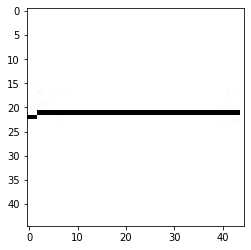

In [4]:
# randomly see any image
img = cv2.imread(files[4710])
plt.imshow(img)


In [5]:
# build the CNN architecture for the model
i = Input(shape=(32,32,1))
x = Conv2D(32, (3,3), padding='same', activation='relu')(i)
x = MaxPool2D((2,2))(x)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = MaxPool2D((2,2))(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(14, activation='softmax')(x)

model = Model(i,x)

In [6]:
gen = ImageDataGenerator(rescale=1/255.0)

In [7]:

train_gen = gen.flow_from_directory(folder_path,
                                    target_size = (32,32),
                                    color_mode = 'grayscale',
                                    class_mode = 'categorical',
                                    batch_size= 64,
                                    shuffle=True)

Found 47827 images belonging to 14 classes.


In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

r = model.fit_generator(train_gen,
                        steps_per_epoch = len(train_gen.filenames)//64,
                        epochs = 10,
                        )

Epoch 1/10
747/747 [==============================] - 947s 1s/step - loss: 0.0253 - accuracy: 0.9922
Epoch 2/10
747/747 [==============================] - 748s 1s/step - loss: 0.0243 - accuracy: 0.9928
Epoch 3/10
747/747 [==============================] - 1199s 2s/step - loss: 0.0208 - accuracy: 0.9936
Epoch 4/10
747/747 [==============================] - 632s 846ms/step - loss: 0.0193 - accuracy: 0.9942
Epoch 5/10
747/747 [==============================] - 66s 88ms/step - loss: 0.0197 - accuracy: 0.9936
Epoch 6/10
747/747 [==============================] - 67s 89ms/step - loss: 0.0201 - accuracy: 0.9938
Epoch 7/10
747/747 [==============================] - 84s 113ms/step - loss: 0.0175 - accuracy: 0.9948
Epoch 8/10
747/747 [==============================] - 67s 90ms/step - loss: 0.0171 - accuracy: 0.9945
Epoch 9/10
747/747 [==============================] - 73s 98ms/step - loss: 0.0148 - accuracy: 0.9955
Epoch 10/10
747/747 [==============================] - 77s 103ms/step - loss: 0.0

In [11]:
model.save("num_detect2nd.h5")

In [13]:
train_gen.class_indices

{'+': 0,
 '-': 1,
 '0': 2,
 '1': 3,
 '2': 4,
 '3': 5,
 '4': 6,
 '5': 7,
 '6': 8,
 '7': 9,
 '8': 10,
 '9': 11,
 'forward_slash': 12,
 'multiplication': 13}

NameError: name 'remove_small_contours' is not defined